# Bike Sharing Demand


## Data Fields
* **datetime** - hourly date + timestamp  
* **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* **holiday** - whether the day is considered a holiday
* **workingday** - whether the day is neither a weekend nor holiday
* **weather** 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* **temp** - temperature in Celsius
* **atemp** - "feels like" temperature in Celsius
* **humidity** - relative humidity
* **windspeed** - wind speed
* **casual** - number of non-registered user rentals initiated
* **registered** - number of registered user rentals initiated
* **count** - number of total rentals

In [1]:
import pandas as pd
import numpy as np

## Load dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
X = train
print(X.shape)

X.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
X.isna().sum().sum()

0

In [5]:
test.isna().sum().sum()

0

## Preprocessing

### parse datetime

In [6]:
X["datetime-year"] = X["datetime"].dt.year
X["datetime-month"] = X["datetime"].dt.month
X["datetime-day"] = X["datetime"].dt.day
X["datetime-hour"] = X["datetime"].dt.hour
X["datetime-minute"] = X["datetime"].dt.minute
X["datetime-second"] = X["datetime"].dt.second

X["day_of_week"] = X["datetime"].dt.dayofweek

X[["datetime","datetime-year","datetime-month","datetime-day","datetime-hour","datetime-minute","datetime-second","day_of_week"]].head()

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,day_of_week
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [7]:
def day_of_week(day):
    if day == 0:
        return "Monday"
    elif day == 1:
        return "Tuesday"
    elif day == 2:
        return "Wednesday"
    elif day == 3:
        return "Thursday"
    elif day == 4:
        return "Friday"
    elif day == 5:
        return "Saturday"
    elif day == 6:
        return "Sunday"

X["day_of_week(humanized)"] = X["day_of_week"].apply(day_of_week)
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,day_of_week,day_of_week(humanized)
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,Saturday


In [8]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

test["day_of_week"] = test["datetime"].dt.dayofweek

test[["datetime","datetime-year","datetime-month","datetime-day","datetime-hour","datetime-minute","datetime-second","day_of_week"]].head()

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,day_of_week
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [9]:
test["day_of_week(humanized)"] = test["day_of_week"].apply(day_of_week)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,day_of_week,day_of_week(humanized)
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,Thursday


## Explore

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### datetime

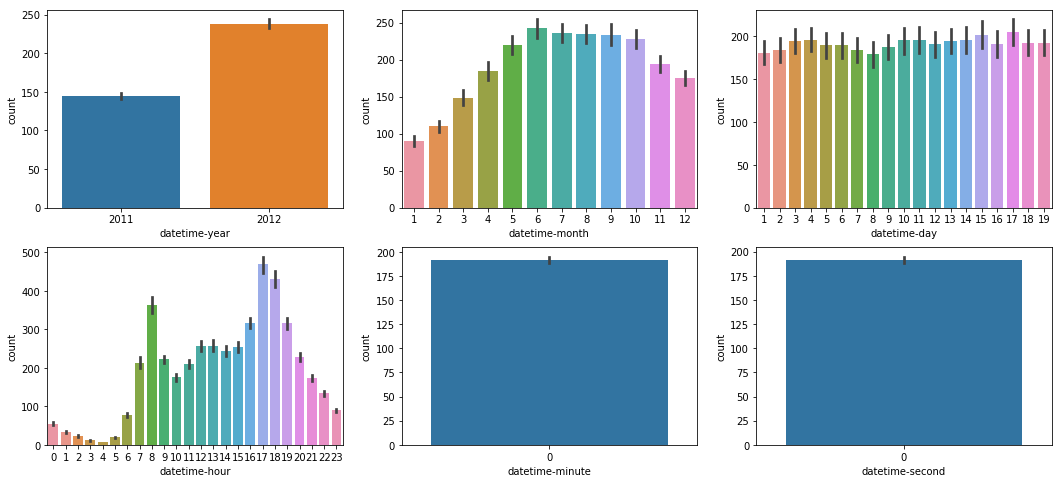

In [11]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)

figure.set_size_inches(18,8)

sns.barplot(data = X, x="datetime-year", y="count", ax=ax1)
sns.barplot(data = X, x="datetime-month", y="count", ax=ax2)
sns.barplot(data = X, x="datetime-day", y="count", ax=ax3)
sns.barplot(data = X, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data = X, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data = X, x="datetime-second", y="count", ax=ax6)

### interpretation

**year**
* Demands of 2012 is larger than 2011. It means the [Capital Bikeshare](https://www.capitalbikeshare.com/) is growing up steadily

**month**
* People tends to use bike during summer (6 - 8) and less use during winter (12 - 2)

**day**
* We can see that we only have data until 19th. other days are in the test data. If we use this data, it will cause overfitting. So, we should not use this data. 

**hour**
* It seems that people tend to use bike during daytime. 
* There are two time of peak, 7 to 9 and 16 to 19. It means people tend to use bike when they go to work and back to home

**minute & second**
* Both are recorded as 0. It means those are not recorded. We don't need to use this.

To sum up, we need **year**,**month**, and **hour** data 

## Year & Month


In [12]:
X["datetime-year(str)"] = X["datetime-year"].astype('str')
X["datetime-month(str)"] = X["datetime-month"].astype('str')

X["datetime-year_month"] = X["datetime-year(str)"] + "-" + X["datetime-month(str)"]

print(X.shape)

X[["datetime-year", "datetime-month", "datetime-year_month"]].head()

(10886, 23)


,datetime-year,datetime-month,datetime-year_month
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1
3,2011,1,2011-1
4,2011,1,2011-1


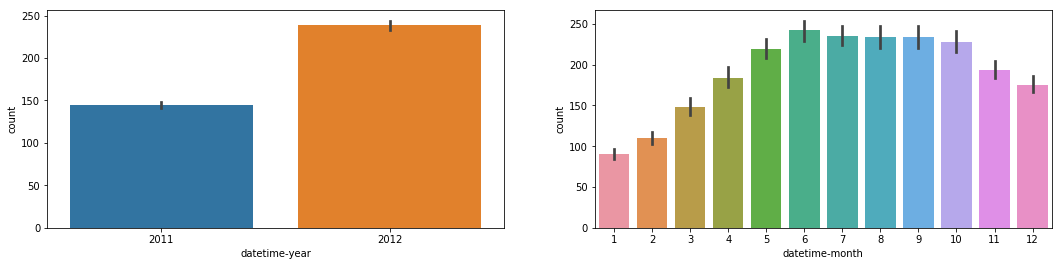

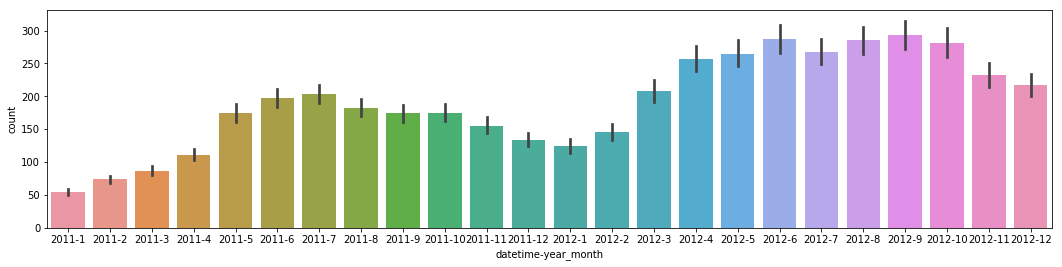

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(18,4)

sns.barplot(data = X, x = "datetime-year", y = "count", ax = ax1)
sns.barplot(data = X, x = "datetime-month", y = "count", ax = ax2)

figure, ax3 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18,4)

sns.barplot(data = X, x = "datetime-year_month", y="count", ax = ax3)


### interpretation

- According to the the plots, we can see the demands of bike is growing up steadily. 
- From the second plots, demands in December is larger than January.
- From the thrid plot, there is no difference between December 2011 and January 2012, however, there is huge differences between January 2011 and December 2012.

Thus, the reason why December has larger count than January is the demand of the company is keep growing up. There is no reason people use bike more in December than January. 

Therefore, we don't use **month** data.



## Hour

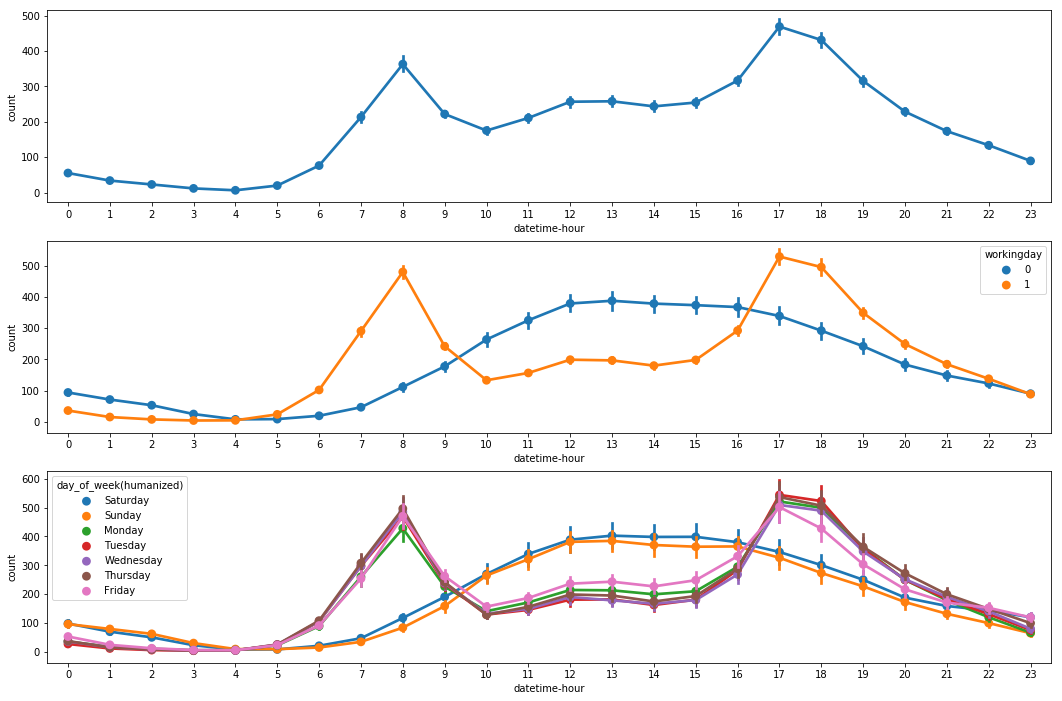

In [14]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(18,12)

sns.pointplot(data=X, x="datetime-hour", y="count", ax=ax1)

sns.pointplot(data=X, x="datetime-hour", y="count", hue = "workingday", ax=ax2)

sns.pointplot(data=X, x="datetime-hour", y="count", hue = "day_of_week(humanized)", ax=ax3)


## Season

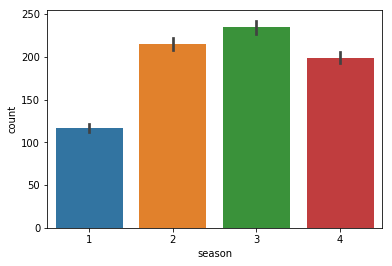

In [15]:
sns.barplot(data = X, x="season", y="count")

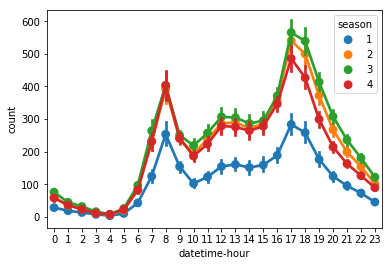

In [16]:
sns.pointplot(data = X, x="datetime-hour", y = "count", hue="season")

## Count

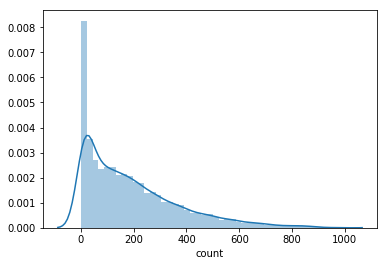

In [17]:
sns.distplot(X["count"])

In [18]:
X["log_count"] = np.log(X["count"] + 1)
print(X.shape)

X[["count","log_count"]].head()

(10886, 24)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


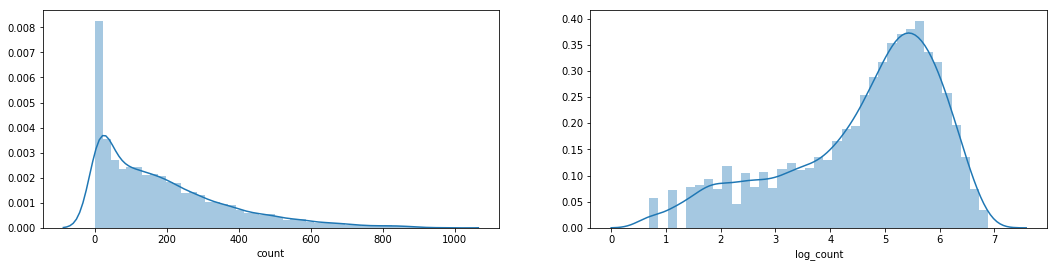

In [19]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols =2)

figure.set_size_inches(18,4)

sns.distplot(X["count"], ax=ax1)
sns.distplot(X["log_count"], ax=ax2)

## Train

In [20]:
categorical_feature_names = ["season","holiday","workingday","weather",
                             "day_of_week","datetime-year","datetime-hour"]

for variable in categorical_feature_names:
    X[variable].astype('category')
    test[variable].astype('category')

In [21]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 
                 'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-hour', 'day_of_week']

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'day_of_week']

In [22]:
y = "log_count"
y

'log_count'

In [23]:
X_train = X[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,day_of_week
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [24]:
X_test = test[feature_names]
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,day_of_week
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [25]:
y_train = X[y]
print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

## RMSLE

In [26]:
from sklearn.metrics import make_scorer

def rmse(predict, actual):
    
    predict = np.array(predict)
    actual = np.array(actual)
    
    distance = predict - actual
    
    square_distance = distance**2
    
    mean_square_distance = square_distance.mean()
    
    score = np.square(mean_square_distance)
    
    return score

rmse_score = make_scorer(rmse)
rmse_score


make_scorer(rmse)

## Hyperparameter Tunning

In [27]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor

sklearn.ensemble.forest.RandomForestRegressor

In [28]:
from sklearn.model_selection import cross_val_score

n_estimators = 300

n_epoch = 100

coarse_hyperparameters_list =[]

for epoch in range(n_epoch):
    max_depth=np.random.randint(low=2, high=100)
    max_features=np.random.uniform(low=0.1, high=1.0)
    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 n_jobs =-1,
                                 random_state=37)
    score = cross_val_score(model, X_train, y_train, cv=20, scoring = rmse_score).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }
    
    coarse_hyperparameters_list.append(hyperparameters)
    
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

    
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)

coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 24, max_features = 0.126380, Score = 0.12518
 1 n_estimators = 300, max_depth = 40, max_features = 0.538942, Score = 0.02261
 2 n_estimators = 300, max_depth = 17, max_features = 0.693911, Score = 0.01933
 3 n_estimators = 300, max_depth = 20, max_features = 0.823629, Score = 0.01848
 4 n_estimators = 300, max_depth = 94, max_features = 0.196195, Score = 0.06580
 5 n_estimators = 300, max_depth = 88, max_features = 0.938467, Score = 0.01890
 6 n_estimators = 300, max_depth = 91, max_features = 0.267427, Score = 0.06580
 7 n_estimators = 300, max_depth = 37, max_features = 0.773917, Score = 0.01871
 8 n_estimators = 300, max_depth = 54, max_features = 0.946312, Score = 0.01890
 9 n_estimators = 300, max_depth = 48, max_features = 0.382912, Score = 0.02726
10 n_estimators = 300, max_depth = 64, max_features = 0.833386, Score = 0.01863
11 n_estimators = 300, max_depth = 85, max_features = 0.718602, Score = 0.01911
12 n_estimators = 300, max_depth = 53, m

,epoch,max_depth,max_features,n_estimators,score
3,3,20,0.823629,300,0.018477
91,91,32,0.833132,300,0.018611
15,15,36,0.846884,300,0.018626
49,49,63,0.833858,300,0.018626
67,67,61,0.897142,300,0.018626
44,44,80,0.866510,300,0.018626
81,81,68,0.901008,300,0.018626
27,27,74,0.846201,300,0.018626
22,22,61,0.834390,300,0.018626
10,10,64,0.833386,300,0.018626


In [29]:
best_hyperparameter = coarse_hyperparameters_list.iloc[0]

best_max_depth = best_hyperparameter["max_depth"]

best_max_features = best_hyperparameter["max_features"]

print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

max_depth(best) = 20.0, max_features(best) = 0.823629


## Random Forest

In [30]:
best_n_estimators = 3000

model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=37,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20.0,
           max_features=0.8236294884194791, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Fit

In [31]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20.0,
           max_features=0.8236294884194791, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Predict

In [32]:
log_predictions = model.predict(X_test)

print(log_predictions.shape)

log_predictions

(6493,)


array([2.51467376, 1.73419017, 1.41670898, ..., 4.60745582, 4.57597249,
       3.87525847])

In [33]:
predictions = np.exp(log_predictions) - 1


print(predictions.shape)

predictions

(6493,)


array([11.36257492,  4.66433879,  3.12352747, ..., 99.22882471,
       96.12244401, 47.19515373])

## Submit

In [34]:
submission = pd.read_csv("data/sampleSubmission.csv")

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [35]:
submission["count"] = predictions


print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.362575
1,2011-01-20 01:00:00,4.664339
2,2011-01-20 02:00:00,3.123527
3,2011-01-20 03:00:00,3.336630
4,2011-01-20 04:00:00,2.712323


In [36]:
submission.to_csv("data/Bike_sharing_Demand_Submission.csv", index=False)